In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler ,OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector

from sklearn.metrics import f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

### `Read the dataset`


In [2]:
TRAIN_DATA_PATH = os.path.join(os.getcwd(),"Egypt_Houses_Price.csv")
df=pd.read_csv(TRAIN_DATA_PATH)
df.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
0,Duplex,4000000,3.0,3.0,400.0,No,7,Unknown,Cash,Ready to move,Finished,Nasr City
1,Apartment,4000000,3.0,3.0,160.0,No,10+,Unknown,Cash,Ready to move,Finished,Camp Caesar
2,Apartment,2250000,3.0,2.0,165.0,No,1,Unknown,Cash,Ready to move,Finished,Smoha
3,Apartment,1900000,3.0,2.0,230.0,No,10,Unknown,Cash,Ready to move,Finished,Nasr City
4,Apartment,5800000,2.0,3.0,160.0,No,Ground,Eastown,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa


In [3]:
###check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27361 entries, 0 to 27360
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type            27361 non-null  object
 1   Price           27359 non-null  object
 2   Bedrooms        27158 non-null  object
 3   Bathrooms       27190 non-null  object
 4   Area            26890 non-null  object
 5   Furnished       27361 non-null  object
 6   Level           27361 non-null  object
 7   Compound        27361 non-null  object
 8   Payment_Option  27361 non-null  object
 9   Delivery_Date   27361 non-null  object
 10  Delivery_Term   27361 non-null  object
 11  City            27361 non-null  object
dtypes: object(12)
memory usage: 2.5+ MB


In [4]:
##check null
df.isnull().sum()

Type                0
Price               2
Bedrooms          203
Bathrooms         171
Area              471
Furnished           0
Level               0
Compound            0
Payment_Option      0
Delivery_Date       0
Delivery_Term       0
City                0
dtype: int64

In [5]:
df.loc[df["City"] == "(View phone number)", "City"] = "unknown"

In [6]:
df[df["City"] == "(View phone number)"]

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City


In [7]:
df = df[df["Bathrooms"] != "Unknown"]
df = df[df["Price"] != "Unknown"]
df = df[df["City"] != "Unknown"]
df = df[df["Furnished"] != "Unknown"]

In [8]:
#### replace the Bedrooms and Bathrooms  "10+" to can change the datatype to float
df["Bedrooms"] = df["Bedrooms"].replace("10+", "11")
df["Bathrooms"] = df["Bathrooms"].replace("10+", "11")

In [9]:
###change the datatype to float
df['Price']=df['Price'].astype('float')
df['Bedrooms']=df['Bedrooms'].astype('float')
df['Bathrooms']=df['Bathrooms'].astype('float')
df['Area']=df['Area'].astype('float')

In [10]:
df["City"].value_counts()

City
New Cairo - El Tagamoa    4298
North Coast               3977
Sheikh Zayed              1582
Madinaty                  1370
Ain Sukhna                1273
                          ... 
New Beni Suef                1
Arbaeen                      1
Darb al-Ahmar                1
Banha                        1
Abu Rawash                   1
Name: count, Length: 169, dtype: int64

In [11]:
##drop colum
df = df.drop(columns=["Compound", "Payment_Option", "Delivery_Date", "Delivery_Term", 'Level'])

In [12]:
###drop nan value
df=df.dropna()

In [13]:
df.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,City
0,Duplex,4000000.0,3.0,3.0,400.0,No,Nasr City
1,Apartment,4000000.0,3.0,3.0,160.0,No,Camp Caesar
2,Apartment,2250000.0,3.0,2.0,165.0,No,Smoha
3,Apartment,1900000.0,3.0,2.0,230.0,No,Nasr City
4,Apartment,5800000.0,2.0,3.0,160.0,No,New Cairo - El Tagamoa


In [14]:
##check the duplicate
duplicates = df[df.duplicated()]
duplicates

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,City
190,Apartment,1650000.0,2.0,2.0,96.0,No,Madinaty
201,Apartment,370000.0,3.0,2.0,157.0,No,New Cairo - El Tagamoa
305,Apartment,280000.0,3.0,2.0,160.0,No,New Cairo - El Tagamoa
322,Apartment,330000.0,2.0,2.0,135.0,No,Haram
351,Apartment,1681202.0,2.0,2.0,130.0,No,New Capital City
...,...,...,...,...,...,...,...
27337,Stand Alone Villa,10000000.0,3.0,3.0,267.0,No,Madinaty
27343,Twin House,6800000.0,4.0,4.0,450.0,Yes,Hadayek 6th of October
27344,Stand Alone Villa,6000000.0,6.0,5.0,383.0,No,Sheikh Zayed
27346,Town House,3900000.0,4.0,3.0,200.0,No,North Coast


In [15]:
##drop duplicate 
df=df.drop_duplicates()

In [16]:
##check the duplicate
duplicates = df[df.duplicated()]
duplicates

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,City


In [17]:
# Reset the index
df = df.reset_index(drop=True)

In [18]:
df

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,City
0,Duplex,4000000.0,3.0,3.0,400.0,No,Nasr City
1,Apartment,4000000.0,3.0,3.0,160.0,No,Camp Caesar
2,Apartment,2250000.0,3.0,2.0,165.0,No,Smoha
3,Apartment,1900000.0,3.0,2.0,230.0,No,Nasr City
4,Apartment,5800000.0,2.0,3.0,160.0,No,New Cairo - El Tagamoa
...,...,...,...,...,...,...,...
15728,Stand Alone Villa,5500000.0,5.0,4.0,364.0,No,North Coast
15729,Twin House,12284000.0,4.0,4.0,337.0,No,Sheikh Zayed
15730,Stand Alone Villa,16500000.0,4.0,4.0,620.0,No,New Cairo - El Tagamoa
15731,Stand Alone Villa,16000000.0,5.0,5.0,530.0,No,New Cairo - El Tagamoa


In [19]:
df["City"].value_counts()

City
New Cairo - El Tagamoa    3626
North Coast               3148
Sheikh Zayed              1349
6th of October            1051
Ain Sukhna                1015
                          ... 
Tura                         1
Khanka                       1
Schutz                       1
Mit Ghamr                    1
Abu Rawash                   1
Name: count, Length: 168, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15733 entries, 0 to 15732
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Type       15733 non-null  object 
 1   Price      15733 non-null  float64
 2   Bedrooms   15733 non-null  float64
 3   Bathrooms  15733 non-null  float64
 4   Area       15733 non-null  float64
 5   Furnished  15733 non-null  object 
 6   City       15733 non-null  object 
dtypes: float64(4), object(3)
memory usage: 860.5+ KB


In [21]:
###Target
df["Price"]

0         4000000.0
1         4000000.0
2         2250000.0
3         1900000.0
4         5800000.0
            ...    
15728     5500000.0
15729    12284000.0
15730    16500000.0
15731    16000000.0
15732    13800000.0
Name: Price, Length: 15733, dtype: float64

### `Data visulization`

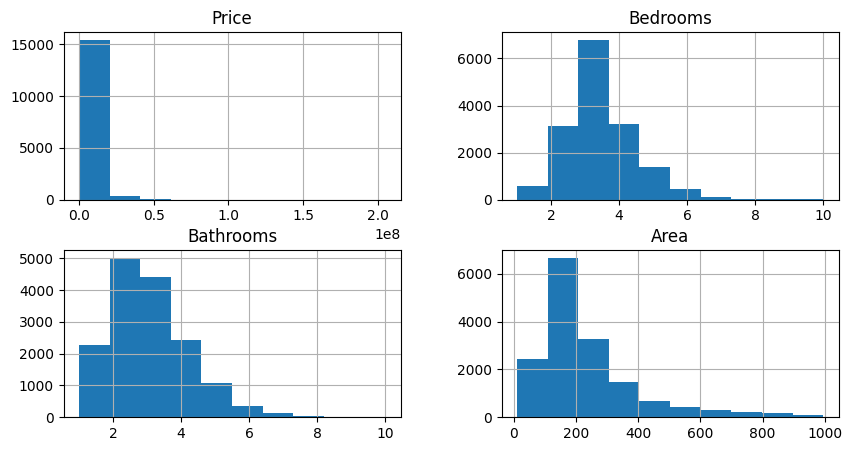

In [22]:
df.hist(bins=10, figsize=(10, 5))
plt.show()

In [23]:
# Assuming df is your DataFrame and 'ColumnName' is the column you're working with
Q1 = df["Price"].quantile(0.25)
Q3 = df["Price"].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["Price"] < lower_bound) | (df["Price"] > upper_bound)]

In [24]:
# Calculate the median of the column
median_value = df["Price"].median()

# Replace outliers with the median
df["Price"] = df["Price"].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

In [25]:
Q1 = df["Bedrooms"].quantile(0.25)
Q3 = df["Bedrooms"].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["Bedrooms"] < lower_bound) | (df["Bedrooms"] > upper_bound)]

In [26]:
# Calculate the median of the column
median_value = df["Bedrooms"].median()

# Replace outliers with the median
df["Bedrooms"] = df["Bedrooms"].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

In [27]:
Q1 = df["Bathrooms"].quantile(0.25)
Q3 = df["Bathrooms"].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["Bathrooms"] < lower_bound) | (df["Bathrooms"] > upper_bound)]

In [28]:
median_value = df["Bathrooms"].median()

# Replace outliers with the median
df["Bathrooms"] = df["Bathrooms"].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

In [29]:
df.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,City
0,Duplex,4000000.0,3.0,3.0,400.0,No,Nasr City
1,Apartment,4000000.0,3.0,3.0,160.0,No,Camp Caesar
2,Apartment,2250000.0,3.0,2.0,165.0,No,Smoha
3,Apartment,1900000.0,3.0,2.0,230.0,No,Nasr City
4,Apartment,5800000.0,2.0,3.0,160.0,No,New Cairo - El Tagamoa


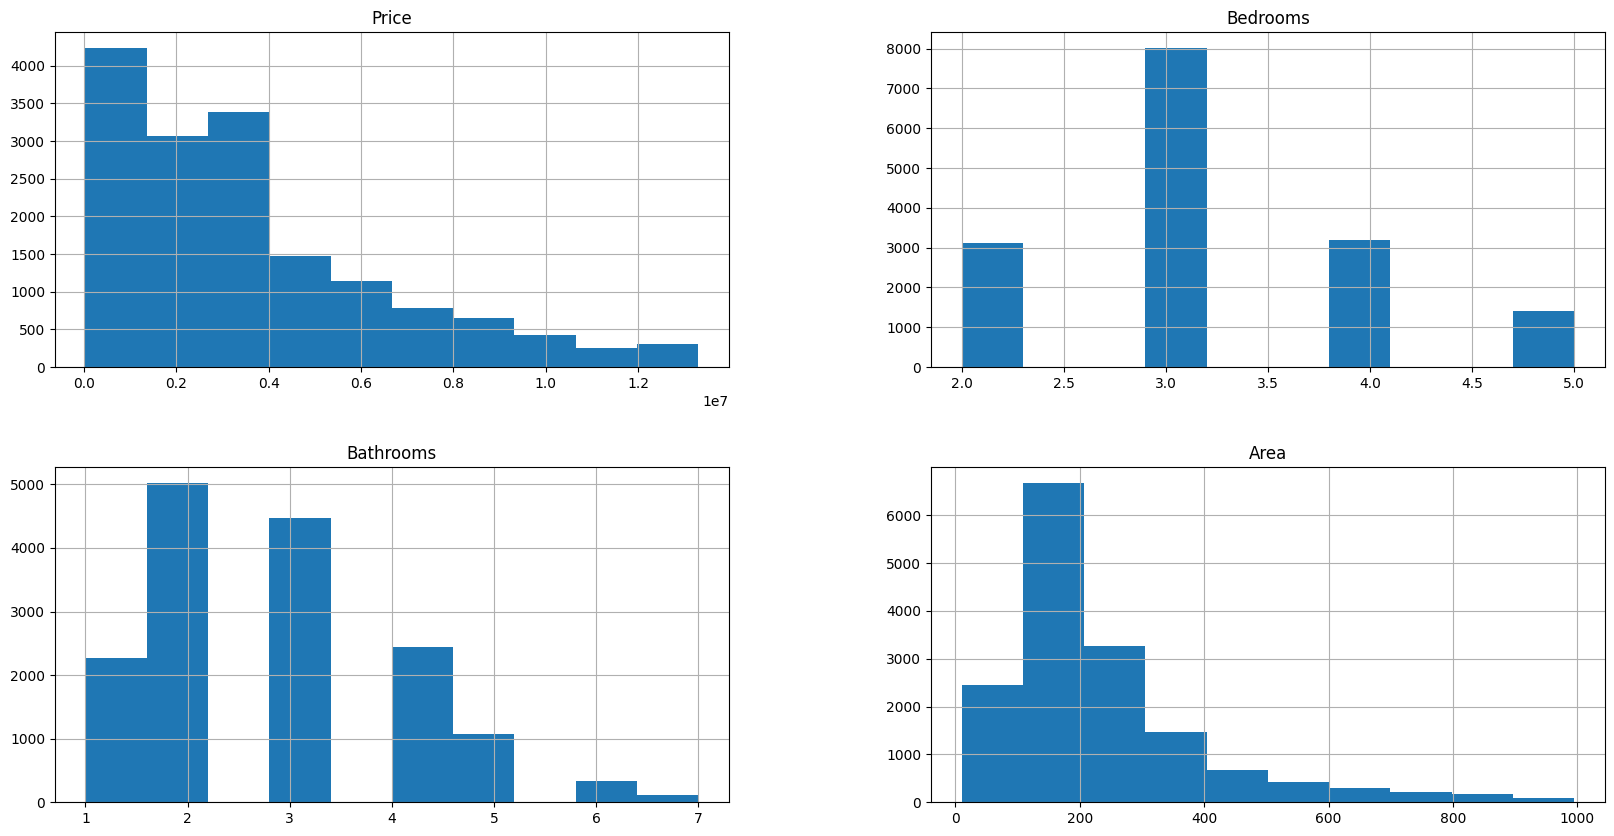

In [30]:
df.hist(bins=10, figsize=(20, 10))
plt.show()

<Axes: ylabel='count'>

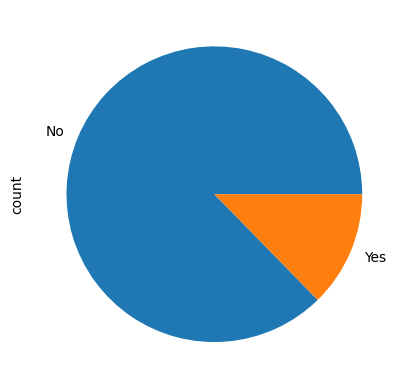

In [31]:
df["Furnished"].value_counts().plot(kind="pie")

In [32]:
df.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,City
0,Duplex,4000000.0,3.0,3.0,400.0,No,Nasr City
1,Apartment,4000000.0,3.0,3.0,160.0,No,Camp Caesar
2,Apartment,2250000.0,3.0,2.0,165.0,No,Smoha
3,Apartment,1900000.0,3.0,2.0,230.0,No,Nasr City
4,Apartment,5800000.0,2.0,3.0,160.0,No,New Cairo - El Tagamoa


In [33]:
## Top 50 Sort apartments from highest price
top_city = (df[["City", "Price", "Type"]].sort_values(by="Price", ascending=False).iloc[:50])
top_city.head()

,City,Price,Type
14511,Sheikh Zayed,13300000.0,Twin House
8996,North Coast,13300000.0,Twin house
15683,Heliopolis,13275000.0,Stand Alone Villa
10945,New Cairo - El Tagamoa,13200000.0,Stand Alone Villa
11191,New Cairo - El Tagamoa,13200000.0,Town House


In [34]:
# This graph describes Apartment price in cities by type
fig = px.histogram(top_city, x="City", y="Price", color="Type")
fig.show()

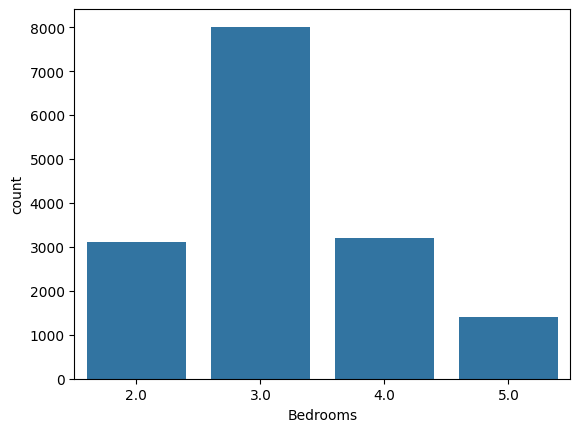

In [35]:
##the count sum Bedrooms
sns.countplot(data=df, x="Bedrooms")
plt.show()

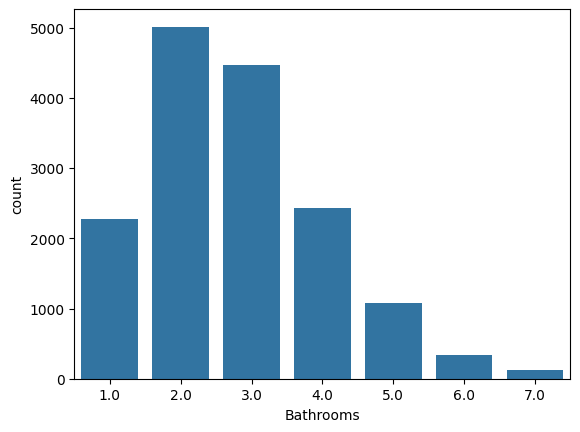

In [36]:
##the count sum Bathrooms
sns.countplot(data=df, x="Bathrooms")
plt.show()

In [37]:
# Top 100 Sort apartments from highest price
top_price = (df[["City", "Price", "Furnished"]].sort_values(by="Price", ascending=False).iloc[:100])
top_price.head()

,City,Price,Furnished
14511,Sheikh Zayed,13300000.0,No
8996,North Coast,13300000.0,No
15683,Heliopolis,13275000.0,No
10945,New Cairo - El Tagamoa,13200000.0,No
11191,New Cairo - El Tagamoa,13200000.0,No


In [38]:
# The chart describes the price of apartments in cities and whether they are furnished or not.
fig = px.histogram(top_price, x="City", y="Price", color="Furnished")
fig.show()

In [39]:
df.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,City
0,Duplex,4000000.0,3.0,3.0,400.0,No,Nasr City
1,Apartment,4000000.0,3.0,3.0,160.0,No,Camp Caesar
2,Apartment,2250000.0,3.0,2.0,165.0,No,Smoha
3,Apartment,1900000.0,3.0,2.0,230.0,No,Nasr City
4,Apartment,5800000.0,2.0,3.0,160.0,No,New Cairo - El Tagamoa


In [40]:
# Is the area of ​​apartments in cities imposed or not?
top_area= (df[["City", "Area", "Furnished"]].sort_values(by="Area", ascending=False).iloc[:50])
top_area.head()

,City,Area,Furnished
9139,North Coast,995.0,No
7743,North Coast,990.0,Yes
11358,Madinaty,990.0,No
13446,New Cairo - El Tagamoa,990.0,No
14602,New Cairo - El Tagamoa,980.0,No


In [41]:
##The graph describes the largest area in cities by Furnished
fig = px.bar(top_area, x="City", y="Area", color="Furnished")
fig.show()

In [42]:
df.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,City
0,Duplex,4000000.0,3.0,3.0,400.0,No,Nasr City
1,Apartment,4000000.0,3.0,3.0,160.0,No,Camp Caesar
2,Apartment,2250000.0,3.0,2.0,165.0,No,Smoha
3,Apartment,1900000.0,3.0,2.0,230.0,No,Nasr City
4,Apartment,5800000.0,2.0,3.0,160.0,No,New Cairo - El Tagamoa


In [43]:
df["Furnished"] = df["Furnished"].replace({"Yes": 1, "No": 0, "Unknown": -1})

C:\Users\omar\AppData\Local\Temp\ipykernel_11676\1510365301.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [44]:
df = df.drop(columns="City")

### `split the dataset`

In [45]:
x = df.drop(columns="Furnished", axis=1)
y = df["Furnished"]


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=47)
 
print("x_train.shape", x_train.shape)
print("y_train.shape", y_train.shape)
print("######" * 10)
print("x_test.shape", x_test.shape)
print("y_test.shape", y_test.shape)

x_train.shape (12586, 5)
y_train.shape (12586,)
############################################################
x_test.shape (3147, 5)
y_test.shape (3147,)


In [46]:
###numerical : Bedrooms , Bathrooms , area ,furnished
## catgeorical : type ,city 
num_col = x_train.select_dtypes(include="number").columns.tolist()
categ_col = x_train.select_dtypes(exclude="number").columns.tolist()

print("the numerical colum \t", num_col)
print("the cateogrical colum \t ", categ_col)

the numerical colum 	 ['Price', 'Bedrooms', 'Bathrooms', 'Area']
the cateogrical colum 	  ['Type']


In [47]:
df["Area"].max()

995.0

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15733 entries, 0 to 15732
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Type       15733 non-null  object 
 1   Price      15733 non-null  float64
 2   Bedrooms   15733 non-null  float64
 3   Bathrooms  15733 non-null  float64
 4   Area       15733 non-null  float64
 5   Furnished  15733 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 737.6+ KB


In [49]:
num_pipe = Pipeline(
    steps=[
        ("selector", DataFrameSelector(num_col)),
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", RobustScaler()),
    ]
)
categ_pipe = Pipeline(
    steps=[
        ("selector", DataFrameSelector(categ_col)),
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder()),
    ]
)
all_pipe = FeatureUnion(
    transformer_list=[("categorical", categ_pipe), 
                      ("numerical", num_pipe)]
)


x_train_final = all_pipe.fit_transform(x_train)
x_test_finall = all_pipe.transform(x_test)

### `Building model`

In [50]:
models = {
    "lR": LogisticRegression(),
    "SVR": SVC(),
    "DT": DecisionTreeClassifier(),
    "xgboost": XGBClassifier(),
    "RF": RandomForestClassifier(),
    'kNN':KNeighborsClassifier(),
}

In [51]:
for name, model in models.items():
    print(f"using model :{name}")
    model.fit(x_train_final, y_train)
    print(f"taring score:{model.score(x_train_final,y_train)}") 
    print(f"test score : {model.score (x_test_finall,y_test)}") 
    y_pred = model.predict(x_test_finall)
    print(f"f1_score:{(f1_score(y_test,y_pred))}") 
    print("------------------------------------------")

using model :lR
taring score:0.8721595423486413
test score : 0.8779790276453765
f1_score:0.015384615384615384
------------------------------------------
using model :SVR
taring score:0.8743047830923248
test score : 0.8767079758500159
f1_score:0.020202020202020204
------------------------------------------
using model :DT
taring score:0.984109327824567
test score : 0.8306323482681919
f1_score:0.3227445997458704
------------------------------------------
using model :xgboost
taring score:0.9122040362307325
test score : 0.8859231013663806
f1_score:0.3082851637764933
------------------------------------------
using model :RF
taring score:0.9840298744636898
test score : 0.859548776612647
f1_score:0.2706270627062706
------------------------------------------
using model :kNN
taring score:0.8920228825679326
test score : 0.8741658722592945
f1_score:0.27999999999999997
------------------------------------------


In [52]:
###Random Forest
model = RandomForestClassifier()
model.fit(x_train_final, y_train)

RandomForestClassifier()

In [53]:
y_pred = model.predict(x_test_finall)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [54]:
y_test

6886     0
12918    0
6154     1
673      0
2727     0
        ..
14446    0
6700     0
14925    0
3572     0
15473    0
Name: Furnished, Length: 3147, dtype: int64

In [55]:
import joblib

In [56]:
joblib.dump(model, "model_RF")

['model_RF']